In [1]:
import os
import keras
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
print('Notebook run using keras:', keras.__version__)

Notebook run using keras: 2.8.0


In [2]:
inet_model = inc_net.InceptionV3()

96124928/96112376 [==============================] - 4s 0us/step


In [18]:
print(inet_model.predict)

<bound method Model.predict of <keras.engine.functional.Functional object at 0x7f8bc9430f10>>


In [3]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

(1, 299, 299, 3)
49152/35363 [=========================================] - 0s 1us/step
('n02133161', 'American_black_bear', 0.6371599)
('n02105056', 'groenendael', 0.03181805)
('n02104365', 'schipperke', 0.0299443)
('n01883070', 'wombat', 0.028509498)
('n01877812', 'wallaby', 0.025093513)


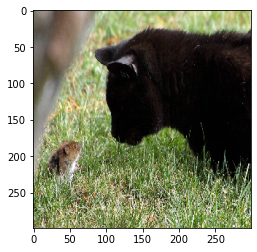

In [4]:
images = transform_img_fn([os.path.join('data','cat_mouse.jpg')])
print(images.shape)
# I'm dividing by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [9]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
explainer = lime_image.LimeImageExplainer()

In [12]:
print(images[0].shape)
print(type(images))

(299, 299, 3)
<class 'numpy.ndarray'>


In [14]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

CPU times: user 5min 26s, sys: 31.4 s, total: 5min 58s
Wall time: 48.1 s


In [10]:
from skimage.segmentation import mark_boundaries

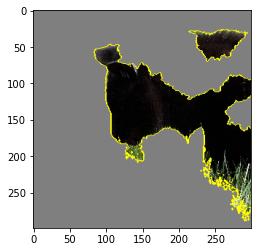

In [11]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))